<a href="https://colab.research.google.com/github/shila121/projects/blob/main/thomsonReuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Framing the Problem Statement
Your objective is to predict whether income of an individual exceeds $50K/per year based
on census data.

# 2.Data Analysis
we will try to understand the data by following ways

1.   hypothesis testing
2.   univariate/bivariate analysis
3.   missing data
4.   numerical data
5.   outliers
6.   categorical data













# Step 1:Hypothesis testing

In [3]:
# import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import dataset
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income'])
data.head()
print('data visualization')
print(data.head())
print(data.columns,len(data.columns))
print(data.shape)
print('*'*80)

# get the categorical columns from the data
catCols = data.select_dtypes('object').columns
print('categorical columns',catCols,len(catCols))
print('*'*80)

# get numerical columns from the data
numCols = data.select_dtypes('number').columns
print('numeric columns',numCols,len(numCols))
print('*'*80)

print(data['income'].unique())
# change the deposit column to numeric value
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['income'] =le.fit_transform(data['income'])
print(data['income'].unique())

data visualization
   age          workclass  fnlwgt  ... hours-per-week  native-country  income
0   39          State-gov   77516  ...             40   United-States   <=50K
1   50   Self-emp-not-inc   83311  ...             13   United-States   <=50K
2   38            Private  215646  ...             40   United-States   <=50K
3   53            Private  234721  ...             40   United-States   <=50K
4   28            Private  338409  ...             40            Cuba   <=50K

[5 rows x 15 columns]
Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object') 15
(32561, 15)
********************************************************************************
categorical columns Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', '

In [4]:
# we will carry out z-test on the numerical columns to know their impact
from statsmodels.stats import weightstats as stests

significant_numCols,in_significant_numCols = [],[]

for i in numCols:
  p_val = stests.ztest(data[i],data.income)
  p_val = p_val[1]
  print('column:',i,'p_val:',p_val)
  if p_val < 0.05:
    status = "Reject Null Hypothesis,Significant predictor"
    print('status',status)
    print('*'*80)
    significant_numCols.append(i)
  else:
    status = 'Accept Null Hypothesis,Insignificant predictor'
    print('status',status)
    in_significant_numCols.append(i)
    print('*'*80)

print('significant numeric columns:',significant_numCols,len(significant_numCols))
print('in_significant numeric columns:',in_significant_numCols,len(in_significant_numCols))

column: age p_val: 0.0
status Reject Null Hypothesis,Significant predictor
********************************************************************************
column: fnlwgt p_val: 0.0
status Reject Null Hypothesis,Significant predictor
********************************************************************************
column: education-num p_val: 0.0
status Reject Null Hypothesis,Significant predictor
********************************************************************************
column: capital-gain p_val: 1.0035332473156045e-152
status Reject Null Hypothesis,Significant predictor
********************************************************************************
column: capital-loss p_val: 0.0
status Reject Null Hypothesis,Significant predictor
********************************************************************************
column: hours-per-week p_val: 0.0
status Reject Null Hypothesis,Significant predictor
********************************************************************************
si

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
# wew will carry out chi-square test on categorical columns to know the significance

significant_catCols,in_significant_catCols = [],[]

from scipy.stats import chi2_contingency

for i in catCols:
  if i != 'income':
    stat,p_val,dof,ex = chi2_contingency(pd.crosstab(data[i],data.income))
    print('column:',i,',p_val:',p_val)
    if p_val < 0.05:
      status = "Reject Null Hypothesis,Significant predictor"
      print('status',status)
      print('*'*80)
      significant_catCols.append(i)
    else:
      status = 'Accept Null Hypothesis,Insignificant predictor'
      print('status',status)
      in_significant_catCols.append(i)
      print('*'*80)

print('significant categorical columns:',significant_catCols,len(significant_catCols))
print('in_significant categorical columns:',in_significant_catCols,len(in_significant_catCols))

column: workclass ,p_val: 2.026505431120716e-220
status Reject Null Hypothesis,Significant predictor
********************************************************************************
column: education ,p_val: 0.0
status Reject Null Hypothesis,Significant predictor
********************************************************************************
column: marital-status ,p_val: 0.0
status Reject Null Hypothesis,Significant predictor
********************************************************************************
column: occupation ,p_val: 0.0
status Reject Null Hypothesis,Significant predictor
********************************************************************************
column: relationship ,p_val: 0.0
status Reject Null Hypothesis,Significant predictor
********************************************************************************
column: race ,p_val: 2.305960610160958e-70
status Reject Null Hypothesis,Significant predictor
**************************************************************

# Step 2:Univariate/Bivariate analysis

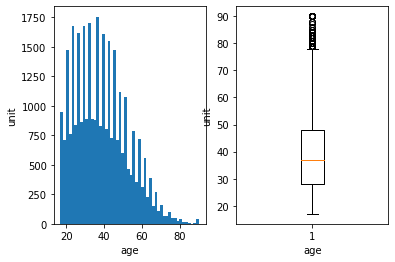

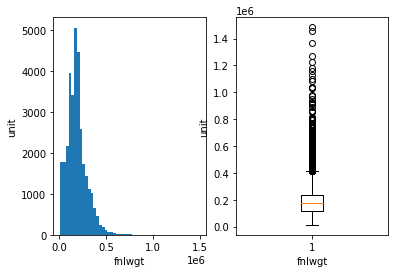

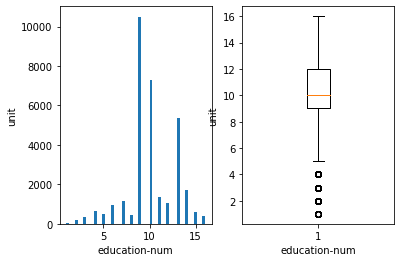

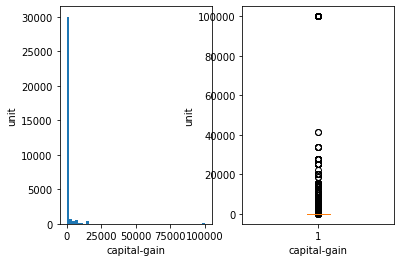

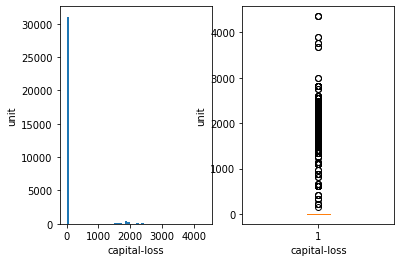

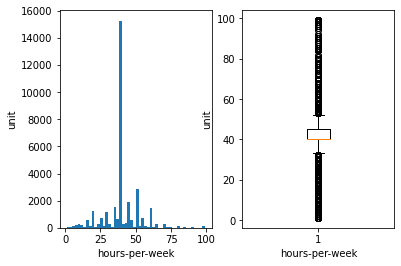

In [6]:
# univariate analysis of numeric columns with histogram and boxplot

for i in numCols:
  plt.subplot(1,2,1)
  plt.hist(data[i],bins =50)
  plt.xlabel(i)
  plt.ylabel('unit')

  plt.subplot(1,2,2)
  plt.boxplot(data[i])
  plt.xlabel(i)
  plt.ylabel('unit')

  plt.show()

In [7]:
# noted that outliers are present in the data

# univariate analysis of categorical columns with value counts

for i in catCols:
  print('column:',i)
  print(data[i].value_counts())
  print('*'*80)

column: workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
********************************************************************************
column: education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
********************************************************************************
column: marital-status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated  

                     age    fnlwgt  ...  hours-per-week    income
age             1.000000 -0.076646  ...        0.068756  0.234037
fnlwgt         -0.076646  1.000000  ...       -0.018768 -0.009463
education-num   0.036527 -0.043195  ...        0.148123  0.335154
capital-gain    0.077674  0.000432  ...        0.078409  0.223329
capital-loss    0.057775 -0.010252  ...        0.054256  0.150526
hours-per-week  0.068756 -0.018768  ...        1.000000  0.229689
income          0.234037 -0.009463  ...        0.229689  1.000000

[7 rows x 7 columns]


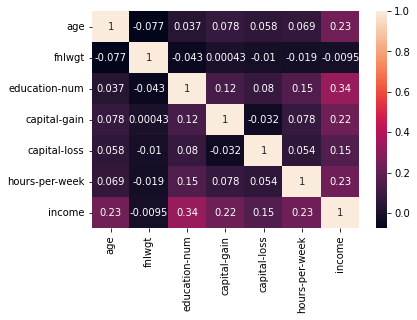

In [8]:
# Bi-variate analysis of numeric data by Co-relation matrix
import seaborn as sns
matrix = data.corr()
print(matrix)

sns.heatmap(matrix,annot = True)


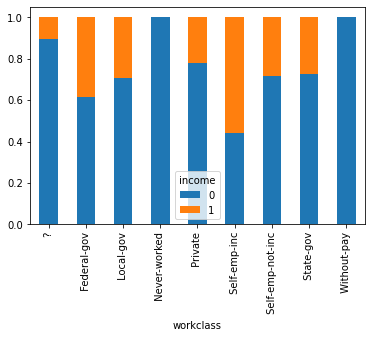

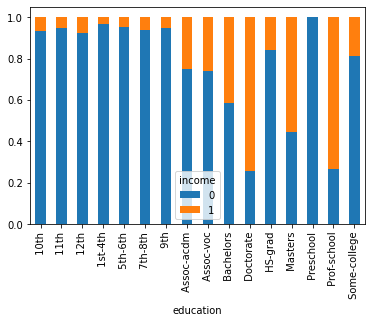

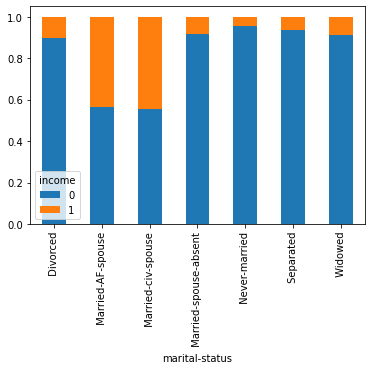

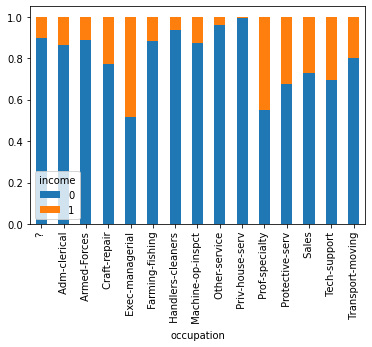

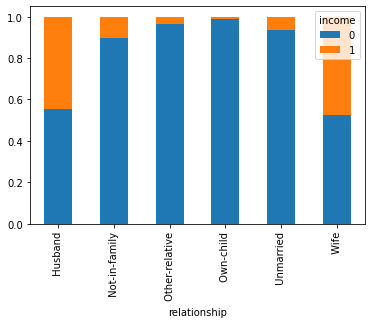

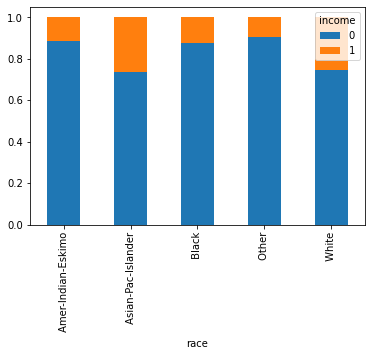

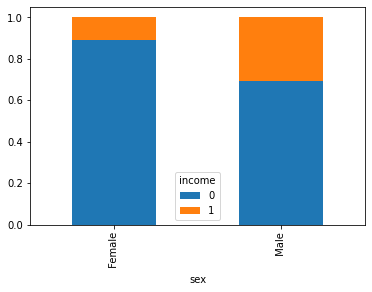

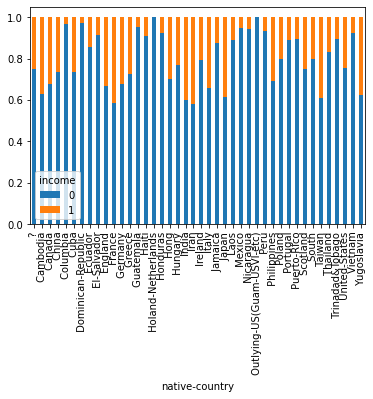

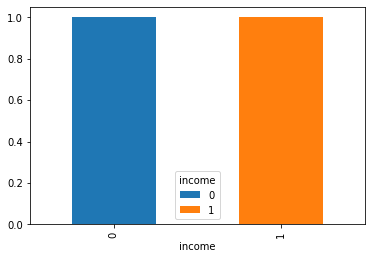

In [9]:
# Bi-variate analysis of categorical columns

for i in catCols:
  category = pd.crosstab(data[i],data['income'])
  category.div(category.sum(1).astype(float),axis =0 ).plot(kind = 'bar',stacked = True)
  plt.show()


# Step 3:Missing Value

In [10]:
# lets analyse if there is any missing values
print(data.isnull().sum())


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


# Step 4:Numerical data analysis

In [11]:
print('numerical columns:',numCols,len(numCols))

# ->1. visualize numerical data
print(data[numCols].head())
print('*'*80)

# ->2. make a list of discrete numerical columns
discrete_numCols = [var for var in numCols if len(data[var].unique())<20]
print('dicrete numerical columns:',discrete_numCols,len(discrete_numCols))
print('*'*80)

# ->3.make a list of discrete numerical columns
continuous_numCols = [var for var in numCols if len(data[var].unique())>20]
print('continuous numerical columns:',continuous_numCols,len(continuous_numCols))
print('*'*80)

# ->4.visualize the continuous numerical columns
print(data[continuous_numCols].head())
print('*'*80)

numerical columns: Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object') 6
   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
0   39   77516             13          2174             0              40
1   50   83311             13             0             0              13
2   38  215646              9             0             0              40
3   53  234721              7             0             0              40
4   28  338409             13             0             0              40
********************************************************************************
dicrete numerical columns: ['education-num'] 1
********************************************************************************
continuous numerical columns: ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week'] 5
********************************************************************************
   age  fnlwgt  capital-

# Step 5.Outliers Analysis

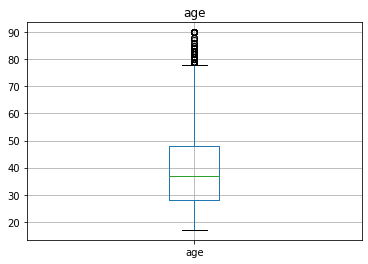

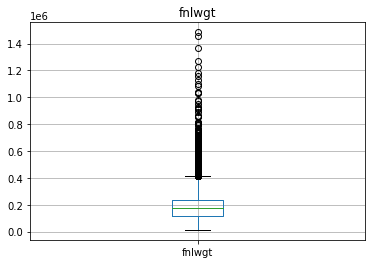

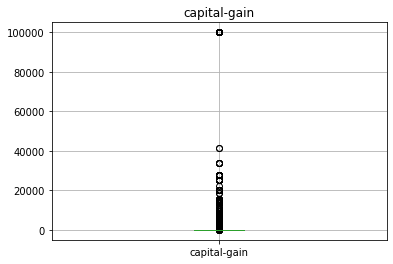

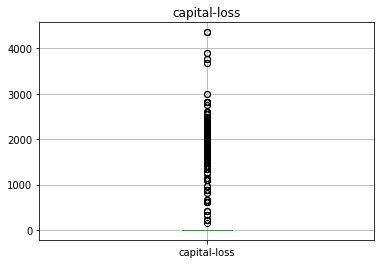

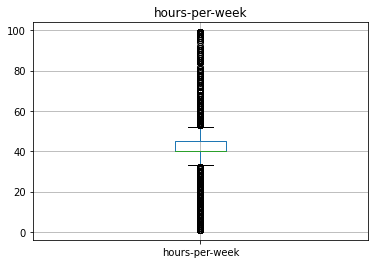

In [12]:
def find_outliers(df,var):
  df = df.copy()
  df.boxplot(column = var)
  plt.title(var)
  plt.show()


for i in continuous_numCols:
  find_outliers(data,i)

# Step 6:Categorical data analysis

In [13]:
# ->1.visualize the categorical data
print('categorical columns:',catCols,len(catCols))
print('-'*60)
print(data[catCols].head())
print('-'*60)

# ->2.cardinality of the categorical data
print(data[catCols].nunique())
print('-'*60)

# ->3 analyse rare labels
def analyse_rare_vars(df,var,rare_percentage):
  df = df.copy()
  tmp = df.groupby(var)['income'].count()/len(df)
  return tmp[tmp < rare_percentage]

for i in catCols:
  print(analyse_rare_vars(data,i,0.01)) #here we,consider rare percent as 1%
  print()

categorical columns: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object') 9
------------------------------------------------------------
           workclass   education  ...  native-country income
0          State-gov   Bachelors  ...   United-States      0
1   Self-emp-not-inc   Bachelors  ...   United-States      0
2            Private     HS-grad  ...   United-States      0
3            Private        11th  ...   United-States      0
4            Private   Bachelors  ...            Cuba      0

[5 rows x 9 columns]
------------------------------------------------------------
workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
sex                2
native-country    42
income             2
dtype: int64
------------------------------------------------------------
workclass
 Never-worked    0.000215
 Without-pay  

# 3.Feature Engineering
Here,we will deal with all the problems like
1.   train_test split
2.   missing value treatment
3.   outlier treatment
4.   rare category treatment
5.   caterical data encoding
6.   feature scaling
7.   feature selection

















In [14]:
#  ->1. Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,data['income'],random_state =0,test_size = 0.2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(26048, 15) (6513, 15) (26048,) (6513,)


In [15]:
# ->2. missing value treatmnet

# get the categorical columns with na values
# no missing data so skipping this step

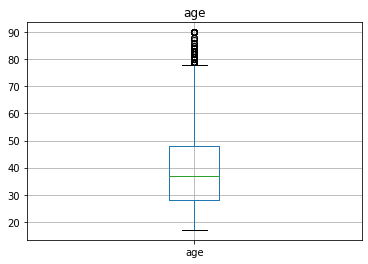

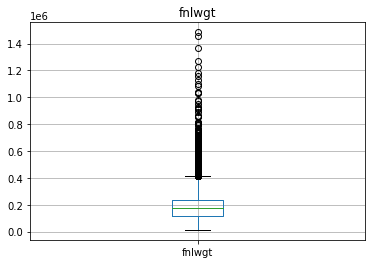

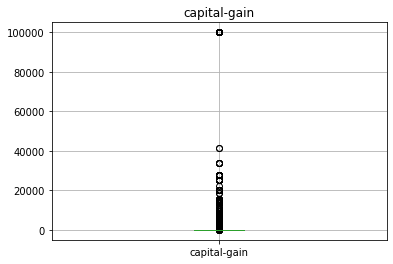

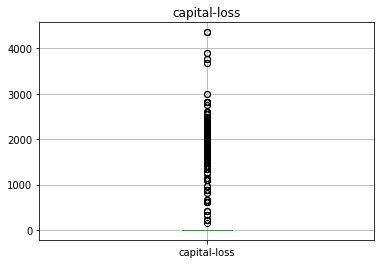

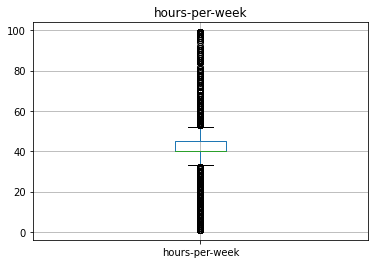

In [16]:
# -> 3. handling outliers


for var in continuous_numCols:
  find_outliers(data,var)

In [17]:
# ->handling rare labels

print('categorical columns:',catCols,len(catCols))

categorical columns: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object') 9


In [18]:
cat_vars = [var for var in X_train.columns if X_train[var].dtype == 'O']

def find_frequent_labels(df,var,rare_percent):
  df = df.copy()
  tmp = df.groupby(var)['income'].count()/len(df)
  return tmp[tmp>rare_percent].index

print('categorical variables:',cat_vars,len(cat_vars))

for var in cat_vars:

  # find the frequent categories
  frequent_ls = find_frequent_labels(X_train,var,0.01)

  # replace rarecategorical columns with 'Rare' labels
  X_train[var] = np.where(X_train[var].isin(frequent_ls),X_train[var],'Rare')

  X_test[var] = np.where(X_test[var].isin(frequent_ls),X_test[var],'Rare')

categorical variables: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'] 8


In [19]:
# ->6.Encoding categorical variables

def replace_categories(train,test,var,target):

  ordered_labels = train.groupby([var])[target].mean().sort_values().index

  ordinal_label ={k:i for i,k in enumerate(ordered_labels,0)}

  train[var] = train[var].map(ordinal_label)
  test[var] = test[var].map(ordinal_label)

for var in cat_vars:
  replace_categories(X_train, X_test, var, 'income')

print(X_train.shape,X_test.shape)
print(X_train.head())

(26048, 15) (6513, 15)
       age  workclass  fnlwgt  ...  hours-per-week  native-country  income
15282   36          2  174308  ...              40               2       0
24870   35          2  198202  ...              54               2       0
18822   38          2   52963  ...              50               2       0
26404   50          2  138270  ...              40               2       0
7842    68          4  116903  ...              40               2       0

[5 rows x 15 columns]


In [20]:
# ->7 Feature scaling
train_vars = [var for var in X_train.columns if var not in ['income']]
print(train_vars,len(train_vars))

# import the scale
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

scaler.fit(X_train[train_vars])

# transform the train and test set
X_train[train_vars] = scaler.transform(X_train[train_vars])

X_test[train_vars] = scaler.transform(X_test[train_vars])

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'] 14


In [21]:
# ->7. feature selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
print(X_train.head())

y_train = X_train['income']
y_test = X_test['income']

# drop unnecessary variables from our training and testing sets
X_train.drop(['income'], axis=1, inplace=True)
X_test.drop(['income'], axis=1, inplace=True)

# remember to set the seed, the random state in this function
sel_ = SelectFromModel(Lasso(alpha=0.005, random_state=0))

# train Lasso model and select features
sel_.fit(X_train, y_train)

            age  workclass    fnlwgt  ...  hours-per-week  native-country  income
15282 -0.052632        0.0 -0.030971  ...             0.0             0.0       0
24870 -0.105263        0.0  0.169550  ...             2.8             0.0       0
18822  0.052632        0.0 -1.049314  ...             2.0             0.0       0
26404  0.684211        0.0 -0.333407  ...             0.0             0.0       0
7842   1.631579        2.0 -0.512721  ...             0.0             0.0       0

[5 rows x 15 columns]


SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [22]:
sel_.get_support()

array([ True,  True, False, False,  True,  True,  True,  True, False,
        True, False,  True,  True, False])

In [23]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feats = X_train.columns[(sel_.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feats)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 14
selected features: 9
features with coefficients shrank to zero: 4


In [24]:
# print the selected features
selected_feats

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'sex', 'capital-loss', 'hours-per-week'],
      dtype='object')

# Checking model ...

In [25]:
# we will evaluate different machine learning classification models 
from sklearn.model_selection import cross_val_score


def cross_val(X_train,X_test,model):
  accuracies = cross_val_score(estimator = model,X=X_train,y=y_train,cv=5)
  return accuracies.mean()


def fit_and_evaluate(model):

  # train the model
  model.fit(X_train,y_train)

  model_pred = model.predict(X_test)
  model_cross = cross_val(X_train,y_train,model)
  return model_cross

# Evaluating various models
# ----------------------------------------

from sklearn import model_selection
from numpy import abs
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
models = []
names = []
score = []

models.append(('Logistic Regression',LogisticRegression()))
models.append(('Linear svc',LinearSVC()))
models.append(('Random forest classifier',RandomForestClassifier()))
models.append(('knn',KNeighborsClassifier()))
models.append(('Guassian NB ',GaussianNB()))
models.append(('Decision TreeClassifier',DecisionTreeClassifier()))
models.append(("xg booster",XGBClassifier()))

for name,model in models:
  logr_cross = fit_and_evaluate(model)
  print("Name:",name,',Cross Validation Score = %0.4f' % logr_cross)
  score.append(logr_cross)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Name: Logistic Regression ,Cross Validation Score = 0.8464


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

Name: Linear svc ,Cross Validation Score = 0.8297
Name: Random forest classifier ,Cross Validation Score = 0.8613
Name: knn ,Cross Validation Score = 0.8542
Name: Guassian NB  ,Cross Validation Score = 0.8318
Name: Decision TreeClassifier ,Cross Validation Score = 0.8140
Name: xg booster ,Cross Validation Score = 0.8687


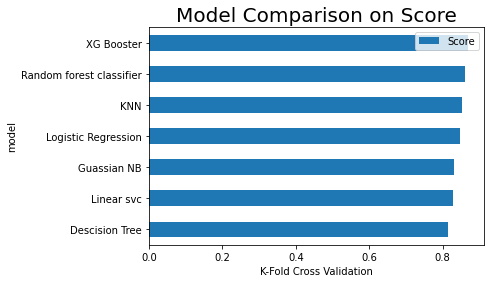

In [26]:
model_comparison = pd.DataFrame({'model':['Logistic Regression','Linear svc','Random forest classifier','KNN','Guassian NB','Descision Tree','XG Booster'],'Score':score})

# horizontal bar  chart
model_comparison.sort_values('Score',ascending=True).plot(x = 'model', y = 'Score', kind = 'barh')
plt.xlabel('K-Fold Cross Validation')
plt.title('Model Comparison on Score', size = 20);
plt.show()

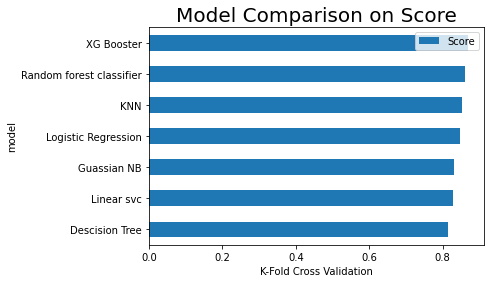

In [27]:
# model choosen-

model_comparison = pd.DataFrame({'model':['Logistic Regression','Linear svc','Random forest classifier','KNN','Guassian NB','Descision Tree','XG Booster'],'Score':score})

# horizontal bar  chart
model_comparison.sort_values('Score',ascending=True).plot(x = 'model', y = 'Score', kind = 'barh')
plt.xlabel('K-Fold Cross Validation')
plt.title('Model Comparison on Score', size = 20);
plt.show()

In [28]:
# Model selected:xg booster
from xgboost import XGBClassifier
clf = XGBClassifier(random_state = 96)
clf.fit(X_train,y_train)
Y_pred = clf.predict(X_test)
clf.score(X_train, y_train)
acc_log_reg = round(clf.score(X_train, y_train) * 100, 2)
acc_log_reg


87.22

In [29]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,Y_pred)
print(cm)
print(accuracy_score(y_test,Y_pred))

[[4616  302]
 [ 596  999]]
0.8621219100261016


In [30]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4918
           1       0.77      0.63      0.69      1595

    accuracy                           0.86      6513
   macro avg       0.83      0.78      0.80      6513
weighted avg       0.86      0.86      0.86      6513

